# Part A
## Question 1
### Introduction
Hash Table is a data structure that stores data is stored associatively. We can use a hash function to map general keys to corresponding indices in the hash table. A **hash function** $h$ maps keys of a given type to integers in a fixed interval [0, N - 1]. In this question we will draw a 11-entry hash table that results from using the hash function h(i) = (3i+5) mod 11 to hash the keys 12, 44, 13, 88, 23, 94, 11, 39, 20, 16, and 5, assummming collisions are handled by separate chaining and linear probing respectively. We will also discuss the differences between the two algorithms.

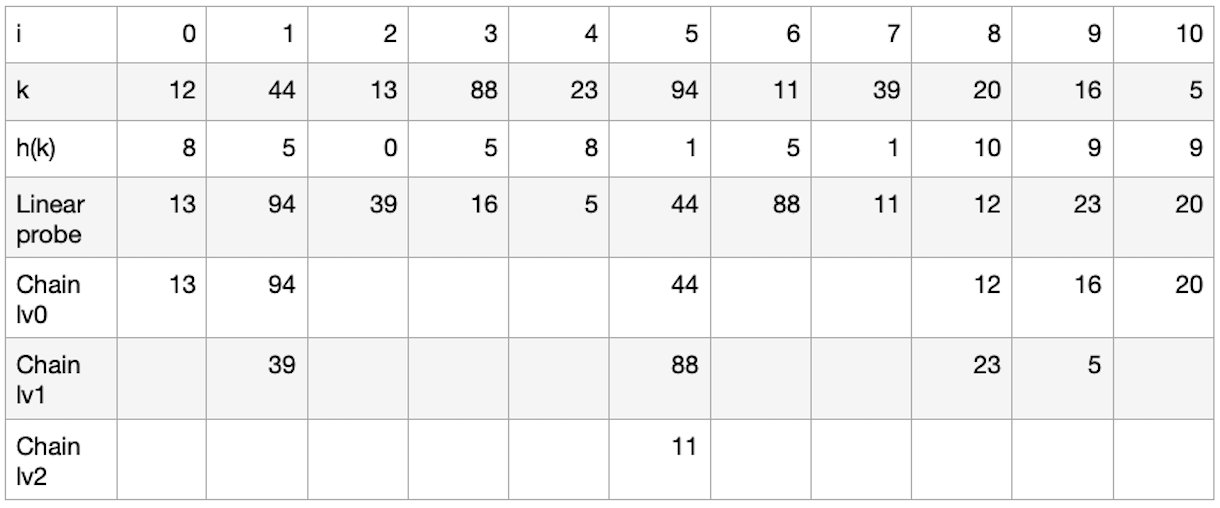

In the above table, i represents the index, k represents the keys, h(k) is the result of hash function, Linear probe and Chain(lv0, lv1, lv2 ) represents the result of which collisions are handled by linear probing and chaining respectively. The two algorithims implemented and their differences will be explained below

### Linear Probing

Linear probing use open addressing scheme, meaning when a new key collides, we will find next empty cell and put it there. Linear probing handles collisions by placing the colliding keys in the next circularly available table cell. Each table cell checked is a "probe". Colliding items chunk together, causing future collisions to have a longer sequence of probes.

For exmaple, in the above table, result of h(k) show that first key should put in cell with index 8, since its empty, so we simply put the key in there, and this process continue until the key is 23. Here h(k) is 8 again, and this time since the cell is not empty, we place the key 23 to the next cell, which is 9. This process continue until all keys are placed in the hash table.

### Separate Chaining
We let each cell in the table point to a linked list of entries that map there. Separate chaining is simple, but requires additional memory outside the table.

For exmaple, in the above table, result of h(k) show that first key should put in cell with index 8(chain lv0), since its empty, so we simply put the key in there, and this process continue until the key is 23. Here h(k) is 8 again, and this time since the cell of chain lv0 is not empty, instead of placing the key 23 to the next cell, we point to a linked list that have the same hash function value. So now 23 is still put under index 8, but place in chain lv1.  This process continue until all keys are placed in the hash table.


## Differences between linear probing and separate chaining

### Deletion
Separate Chaining: deleting is straight forward, just delete the element you want to remove from the table, moving the position of other elements is not required.

Linear probing:  when deleting an element, the position of the deleted element is marked as deleted and need to rehash the cluster to the right of the deleted key, cannot just leave it null/None or simply sliding the succeeding elements upon removal, otherwise will result in incorrectness.

### Storation
In order to store both values, with different keys that would have been stored in the same location, chaining and open-addressing take different approaches: while chaining resolves the conflict by created a linked list of values with the same hash; Linear probing tries to attempts to find a different location to store the values with the same hash.

### Time
Separate Chaining: After calculating the hash function, we need to get the first element from the list to get the value required. Therefore, you access the pointer to the head of the list and then the value, and so there are **2 operations**.

Linear probing: With open-addressing, when there is no collision, we obtain the value we are seeking immediately. Therefore, **only 1 operation** is required and it is faster.

## Conclustion
We can see that in a hash table is a effective way to store data, but there might be collision problem when using it. When that happens, we have two methods to deal with it, they are linear probing and separate chaining respectively and they both have their own pros and cons, that means neither of them are absolutely better than the other one and not we should choose between them accordingly based on what aspeects we value most(e.g. memory space, time).

## Question 2
### Introduction
An undirected graph is a graph that all nodes are connected together and all the edges are bidirectional. In this question, we will draw the according undirected graph, then give the 
sequences of vertices visited using a BFS and DFS traversal respectively, the observations during the process will also be discussed

### 2a
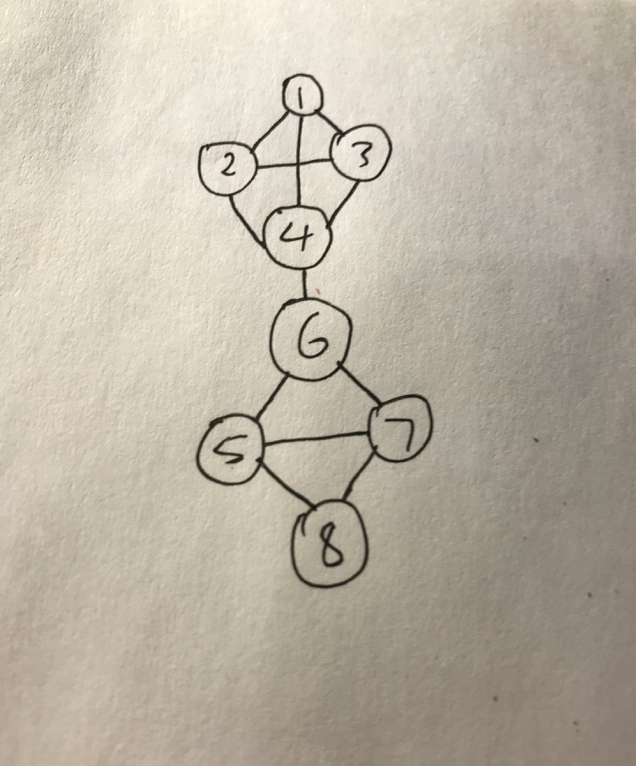

## 2b
Sequence of vertices of G visited using a DFS traversal starting at vertex 1:
1,2,3,4,6,5,7,8

## 2c
Sequence of vertices of G visited using a BFS traversal starting at vertex 1:
1,2,3,4,6,5,7,8

## Explanation and observation
### DFS
Depth First Search(DFS) algorithm is an algorithm for traversing trees using an edge based technique and uses a stack data structure. It begins the search from root node and then visits all nodes in each branch before backtracking. In other words, it perform two operations: 
- visited vertices would be pushed into the stack
- If no vertices left the visited vertices would be popped

### BFS
Breadth First Search(BFS) algorithm is an algorithm for traversing trees using an vertex based technique and uses a queue data structure. It means it uses first in first out approach. It begins the search from a root vertex and marked it after visiting it, then moves on to the closest unvisited adjacent nodes, stored in the queue and repeat the procedure, until all vertexes in the graph are visited and marked

### observations about the obtained sequences
We can see that in this question, the sequences obtained by both DFS and BFS algorithm are the same, and these two algorithm have the same time complexity--**O(N+M)**, where N equals the number of vertices and M is the number of edges. 

In terms of memory requirement, BFS and DFS are different. Since the maiximum memory required by BFS equals to the width of the tree and DFS equals to the depth of the tree, if our tree is very wide, using BFS might take up huge amount of memory space, and thus DFS is better; likewise, if our tree is very deep, BFS is a better chocie. For the tree in our question, BFS should be better theoretically since it is more of a deep tree, but as the depth is not, so the difference between two algorithms might be minimal.

## Conclustion
BFS and DFS traversal are both useful algorithms for traversing vertices in a graph, in this question we formed a undirected graph, found out the sequence using of vertices of G visited using a BFS traversal and DFS traversal respectively, and observe that they have the same time complexity but different memory requirement.

# Part B

## Question 1
### Introduction
In this question, we will plot and discuss about the running times of sorting using bubble, quick and merge sort algorithms, the obtained results will be discussed in terms of time complexity of each algorithm and the initial distribution of the input data

### Bubble sort algorithm 

In [30]:
def bubble_sort(arr):
    arr_size = len(arr)
    for i in range(arr_size):
        for j in range(i, arr_size):
            if arr[i] > arr[j]:
                arr[i], arr[j] = arr[j], arr[i]
    return arr


### Quick sort algorithm

In [31]:
def partition(arr, low, high):
    """Return a pivot element for Quicksort."""
    key = arr[high]
    pivot = low
    for i in range(low, high):
        if arr[i] <= key:
            arr[i], arr[pivot] = arr[pivot], arr[i]
            pivot += 1

    arr[pivot], arr[high] = arr[high], arr[pivot]
    return pivot


def quicksort(arr, low=0, high=None):
    if high is None:
        high = len(arr)-1
    
    if high < low:
        return
    else:
        pivot = partition(arr, low, high)
        quicksort(arr, low, pivot-1)
        quicksort(arr, pivot+1, high)


def quick_sort_simple(data):
    if len(data) > 1:
        less = []
        equal = []
        greater = []
        pivot = data[0]

        for x in data:
            if x < pivot:
                less.append(x)
            elif x == pivot:
                equal.append(x)
            else:
                greater.append(x)

        return quick_sort_simple(less) + equal + quick_sort_simple(greater)

    else:
        return data

### Merge sort algorithm

In [32]:
def merge(left, right):
    result = []
    left_idx, right_idx = 0, 0
    while left_idx < len(left) and right_idx < len(right):
        if left[left_idx] <= right[right_idx]:
            result.append(left[left_idx])
            left_idx += 1
        else:
            result.append(right[right_idx])
            right_idx += 1
 
    if left:
        result.extend(left[left_idx:])
    if right:
        result.extend(right[right_idx:])
    return result


def mergesort(arr):
    if len(arr) <= 1:
        return arr
 
    mid = len(arr) // 2
    left = arr[:mid]
    right = arr[mid:]
 
    left = mergesort(left)
    right = mergesort(right)
    return list(merge(left, right))

### Plot running time

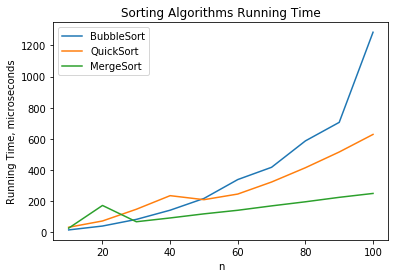

In [77]:
import numpy as np
import time
from time import perf_counter 
from matplotlib.pyplot import figure

x=[10,20,30,40,50,60,70,80,90,100]

time_bubble_sort=[]
time_quick_sort=[]
time_quick_sort2=[]
time_merge_sort=[]
def SortingRunningTime(func,t):
    for value in x:
        A=[e for e in range(value)]
        A = list(reversed(A)) ## Arrange the input list in reverse
        start=perf_counter()  #get the time before running the function
        func(A)
        end=perf_counter()  #get the time after running the function
        ElapsedTime=end-start #get the running time by subtracting the two times
        t.append(ElapsedTime*1e6) #convert to microsecond for higher redability
SortingRunningTime(bubble_sort,time_bubble_sort)   
# RunningTime(quick_sort_simple,time_quick_sort)  
SortingRunningTime(quicksort,time_quick_sort2)  
SortingRunningTime(mergesort,time_merge_sort)  

import matplotlib.pyplot as plt
plt.plot(x,time_bubble_sort)
plt.plot(x,time_quick_sort2)
plt.plot(x,time_merge_sort)
plt.ylabel('Running Time, microseconds')
plt.xlabel('n')
plt.title('Sorting Algorithms Running Time')
plt.legend(['BubbleSort', 'QuickSort', 'MergeSort'], loc='upper left')

#Remove the whitespace around the image with: bbox_inches='tight', reference: https://stackoverflow.com/questions/9622163/save-plot-to-image-file-instead-of-displaying-it-using-matplotlib
# plt.savefig('Sorting Algorithms Running Time.pdf', bbox_inches='tight') 
plt.show()


The three running times are plotted in the same graph for better and more visual comparison. We can see clearly from the plotted graph that as input list size grows, merge sort algorithm has the least running time, follow by quick sort algorithm, and the bubble sort one has the longest running time.
This means that in terms of speed(best to worst): **bubble sort > qucik sort > merge sort**<br>


### Time complexity of each approach and initial distribution of the input data
Time complexity of an algorithm quantifies the amount of time taken by an algorithm to run as a function of the length of the input.<br>
Since the input list A we used initially sorted in reverse (descending order) before running the sorting algorithms, we are actually running the worst cases of them, and thus the time complexity we get from applying the sorting algorithms to the lists are **worst case time complexity**.


Although the running time of the three approaches are different, we can see from the grapth that the **time complexity of bubble sort and quick approach are the same**, they are both
**O(n^2)**.

#### Bubble sort
Bubble sort algorithm is based on a structured pattern of comparison-exchange
(CE) operations. In CE operations we take value in two adjacent slots in the sequence and if the values are out of order (i.e. the larger before the smaller), then swap them around. Below is a pseudocode for bubble sort algorithm:

Input: A an array of n elements <br>
Output: A is sorted <br>
for s = 0 to n-1 do # Passes <br>
&emsp;for current = 0 to n-2 do     # Sweeps  <br>
&emsp;&emsp;if A[current] > A[current + 1] then <br>
&emsp;&emsp;&emsp;# Comparison Exchange (CE)<br>
&emsp;&emsp;&emsp;swap A[current] and A[current + 1] <br>
&emsp;&emsp;endif<br>
&emsp;endfor<br>
endfor<br>

As we can see it carries out n − 1 passes through the list. For each pass, it carries out a sweep of n − 1 comparison exchanges from left to right. Therefore, the total number of comparisons in worst case will be **O(n^2)**

#### Quick sort
Below is a pseudocode for bubble sort algorithm:

Input: A an array <br>
Output: A is sorted <br>
if |A| > 1 then<br>
&emsp;pivot ← some element from A and remove it <br>
&emsp;E.add(pivot)<br>
&emsp;while A is not empty do # divide A into S, E, and G<br>
&emsp;&emsp;elt ← get first element of A and remove it <br>
&emsp;&emsp;if elt < pivot then<br>
&emsp;&emsp;&emsp;S.add(elt) <br>
&emsp;&emsp;else<br>
&emsp;&emsp;&emsp;if elt = pivot then <br>
&emsp;&emsp;&emsp;&emsp;E.add(elt)<br>
&emsp;&emsp;&emsp;else <br>
&emsp;&emsp;&emsp;&emsp;G.add(elt)<br>
&emsp;&emsp;&emsp;endif <br>
&emsp;&emsp;endif<br>
&emsp;endwhile<br>
&emsp;quick sort(S) # sort elements less than pivot<br>
&emsp;quick sort(G) # sort elements greater than pivot<br>
&emsp;Reconstruct A by copying contents of S, E, G (in that order) back<br>
into A <br>
endif<br>

As we can see when implementing quick sort, if input array A has fewer than two elements, we do nothing; if A has at least two elements, we do the following:
- Select a pivot element x from A
-  Remove elements from A and place: those less than x in S (smaller); those equal to x in  E (equal), those greater than x in G; those greater than x in G
- Recursively sort S and G
- Place elements back in A in the order, first the elements of S, then those of E and then those of G.

Therefore for the worst case, since at each level we have 1 element less than the previous one, T(n) = cn ∗ n which is **O(n^2)**, while cn= c operations per loop (n elements).

#### Merge sort
Below is a pseudocode for merge sort algorithm:<br>
Input: A an array <br>
&emsp;Output: A is sorted <br>
if |A| > 1 then # 1 op<br>
&emsp;for j ← 0 to |A|/2 do # 1 op per loop (n/2) <br>
&emsp;&emsp;add A[j] to A1 # 1 op per loop<br>
&emsp;endfor<br>
&emsp;for j← |A|/2 +1 to |A| do # 1 op per loop (n/2)<br>
&emsp;&emsp;add A[j] to A2 # 1 op per loop<br>
&emsp;endfor<br>
&emsp;merge sort(A1) # 1 op<br>
&emsp;merge sort(A2) # 1 op<br>
&emsp; A = merge(A1, A2) # T(n)= 8*(n/2 + n/2)=8n<br>
endif<br>
return A # 1 op<br>

As we can see when implementing merge sort, we are trying to take two (sorted) arrays and merge them into a single sorted array. To sort an array A,  If A has fewer than two elements, we do nothing. But if A has at least two elements:
- Split A into two arrays A1 and A2 of equal size (+/- 1)
- Recursively sort A1 and A2
- Transfer elements back into A by merging (sorted) A1 and (sorted) A2.

Therefore, for sorting the worst case, at each split level there are 2n operations: Tsplit(n) = 2nlog2(n) which is O(nlogn)
At each merge level we have 8n operations: Tmerge(n) = 8nlog2(n) which is O(nlogn)
So overall, the time complexxity is **O(nlogn)**

## Conclusion
We can see when calculating the worst case, for the three sorting algorithms, time complexity of bubble sort and quick approach are the same and are both O(n^2); while the time complexity of merge sort is O(nlogn)

## Question2
### Introduction
A weighted graph is a graph that each branch of it is given a numerical weight. In this question, we will first apply Dijkstra’s algorithm for finding the shortest distance from vertex A to vertex G, discuss about the results, and then verify the finding using netwrokx Python package.

### 2a

The Dijkstra’s algorithm is applied to the given weighted graph and below is the changes of the graph after each step

   
Notes that nodes have been visited are in **pink** colour, lowest total distance currently known for each node are in **red**, unvisited neighbours for the current vertex are in **yellow**, and the best path known so far to each node are put in the array named visited.


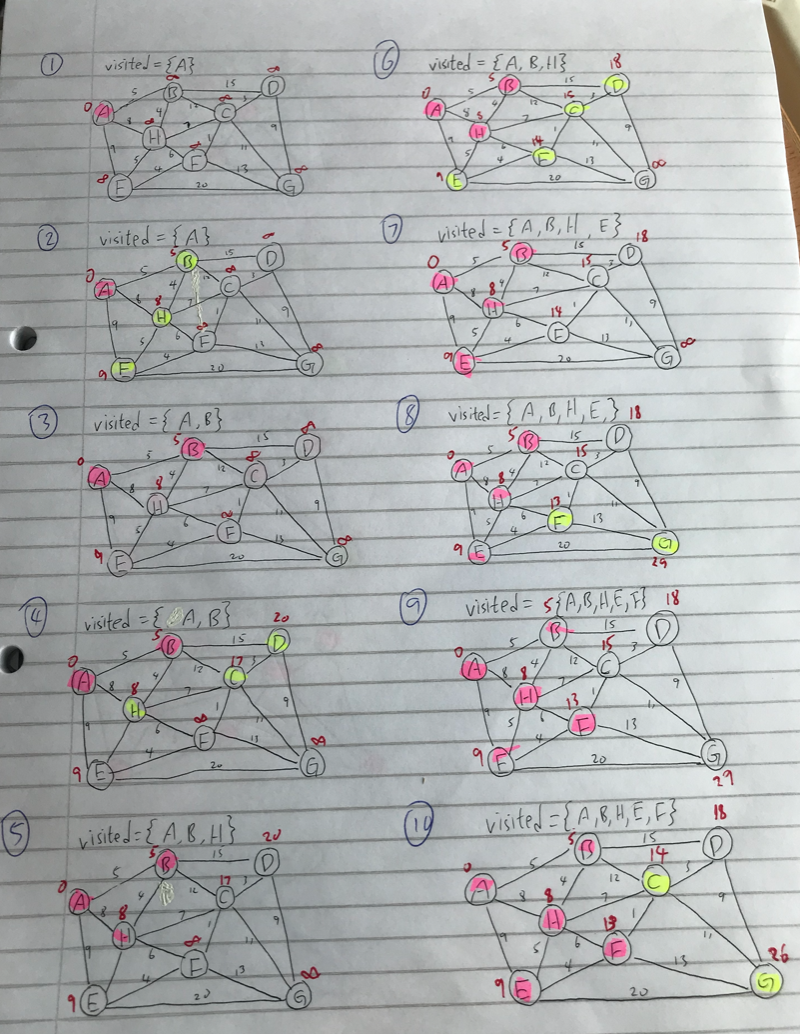
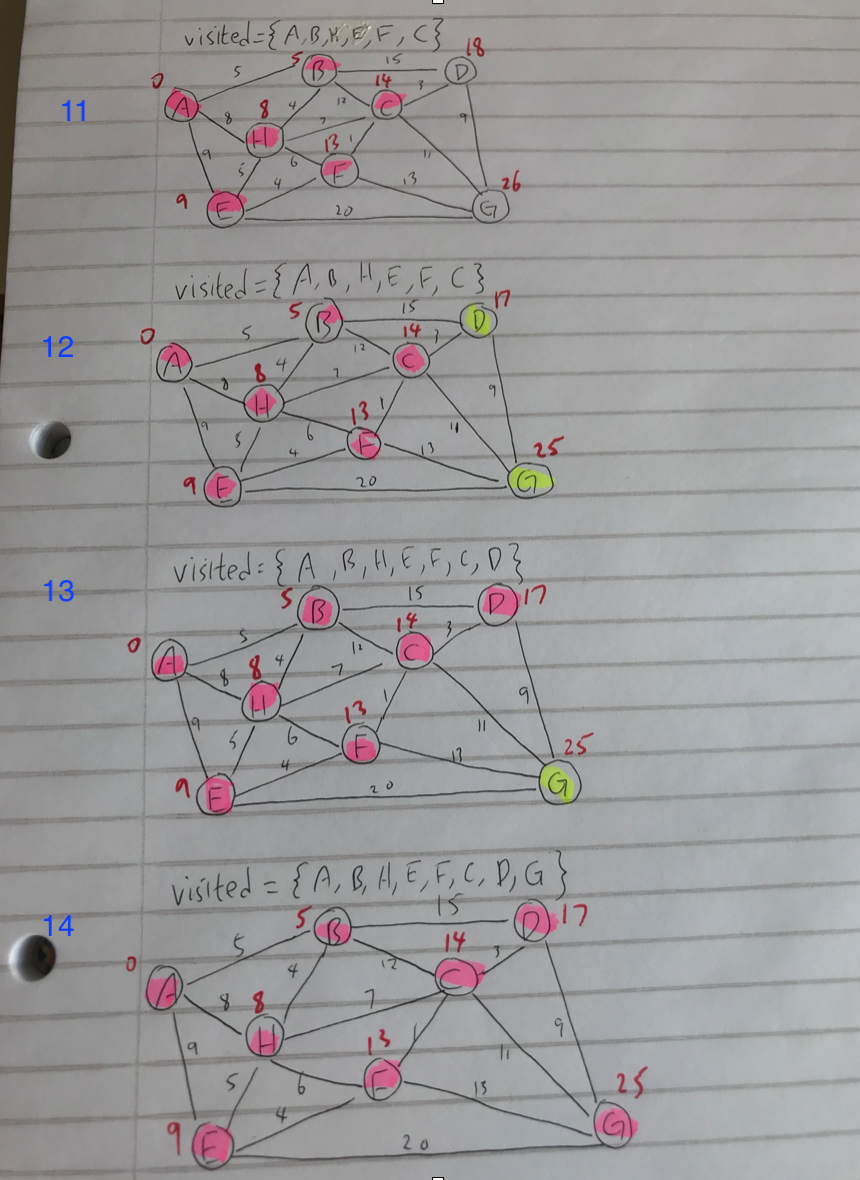

In the above graph, we first pick start and end vertices (from A to G), then mark the start vertex as 0 distance and all other vertices at ∞ and repeat the follwing steps until we reach the end vertex:
    1 Calculates total distance to each unvisited neighbour for the current vertex
    2 Update neighbour’s distance if smaller
    3 Pick the vertex with the lowest marked distance and set as current
    4 Mark current as visited
    

We can see that the shortest distance from vertex A to vertex G is 25. As discussed in the above steps, the distance is obtained by keep updating smaller neighbour's distance when traversing the nodes. For example, in step 10 when we hadn't visited node C yet, from node F we only know the shortest distance so far(from A to G) was 29, but after we visited C in step 12, we updated the distance to 26. This process keep repeating until we reach the end vertex.

Also, we can see that the path we need to find in the weighted graph above is not worst case since we don't need to traverse and explore every vertex and every edge, we didn't traverse vertice H in this graph.      

In terms of complexity, the time complexirt of a basic Dijkstra algorithm like in our question is O(V^2), but it can be optimised to O(E+VlogV)

### 2b i, ii
We will use the `networkx` package (https://networkx.github.io/documentation/) to create a graph, $G$, and add vertices (nodes) $A$ through $G$ with edges.

In [66]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
#create an empty weighted graph, G
G = nx.Graph()

#add vertices (nodes) with their weights given in figure 1 to G
G.add_node('A')
G.add_node('B')
G.add_node('C')
G.add_node('D')
G.add_node('E')
G.add_node('F')
G.add_node('G')
G.add_node('H')

G.add_edge('A', 'B', weight=5)
G.add_edge('A', 'H', weight=8)
G.add_edge('A', 'E', weight=9)

G.add_edge('B', 'H', weight=4)
G.add_edge('B', 'C', weight=12)
G.add_edge('B', 'D', weight=15)

G.add_edge('C', 'H', weight=7)
G.add_edge('C', 'F', weight=1)
G.add_edge('C', 'G', weight=11)
G.add_edge('C', 'D', weight=3)

G.add_edge('D', 'G', weight=9)

G.add_edge('E', 'H', weight=5)
G.add_edge('E', 'F', weight=4)
G.add_edge('E', 'G', weight=20)

G.add_edge('F', 'H', weight=6)
G.add_edge('F', 'G', weight=13)

print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 8
Number of edges: 16
Average degree:   4.0000


### 2b iii
Now, we will use the networkx plotting functionality (that uses `matplotlib` under the covers) to plot the graph. The layout could be visualised in any way as the origin and the lengths of the edges are arbitrary.

The x and y co-ordinates in a dictionary is specified so that the layout is close to that in the question.

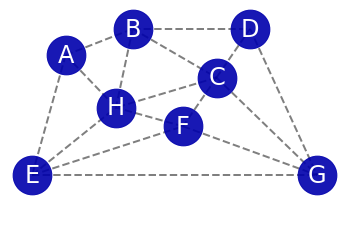

In [2]:
pos= {'A': [-.7, .0], 'B': [-.3,  .7],
      'C': [0.2,-.6], 'D': [0.4, .7], 'E': [-.9, -3.2], 
      'F': [.0, -1.9], 'G': [.8,-3.2], 'H': [ -.4, -1.4]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

### 2b iv

Find shortest weighted paths in G from node A

In [3]:
path=nx.single_source_dijkstra_path(G,"A") 

Compute the shortest path length between starting node A and all other reachable nodes(B, C, D, E, F, G, H) for the weighted graph.

In [4]:
distance=nx.single_source_dijkstra_path_length(G,"A")

Lists that contains its shortest path with the minimum distance for each vertex, the syntax of each list will be [path, distance], i.e., in each list, the nodes inside the list are its shortest path and and the number is the minimum distance from node A to that vertex

For reachable node A

In [6]:
path["A"]+[distance["A"]]

['A', 0]

For reachable node B:

In [7]:
path["B"]+[distance["B"]]

['A', 'B', 5]

For reachable node C

In [8]:
path["C"]+[distance["C"]]

['A', 'E', 'F', 'C', 14]

For reachable node D

In [9]:
path["D"]+[distance["D"]]

['A', 'E', 'F', 'C', 'D', 17]

For reachable node E

In [10]:
path["E"]+[distance["E"]]

['A', 'E', 9]

For reachable node F

In [11]:
path["F"]+[distance["F"]]

['A', 'E', 'F', 13]

For reachable node G

In [16]:
path["G"]+[distance["G"]]

['A', 'E', 'F', 'C', 'G', 25]

For reachable node H

In [17]:
path["H"]+[distance["H"]]

['A', 'H', 8]

### 2b v
We use node positioning algorithms provided by Graphviz for drawing the shortest path tree http://sparkandshine.net/en/networkx-application-notes-draw-trees-with-pygraphviz/

First we remove all unwanted edges

In [18]:
G.remove_edge('B', 'H')
G.remove_edge('B', 'C')
G.remove_edge('B', 'D')

G.remove_edge('C', 'H')

G.remove_edge('D', 'G')

G.remove_edge('E', 'H')
G.remove_edge('E', 'G')

G.remove_edge('F', 'H')
G.remove_edge('F', 'G')

Draw a shortest path tree

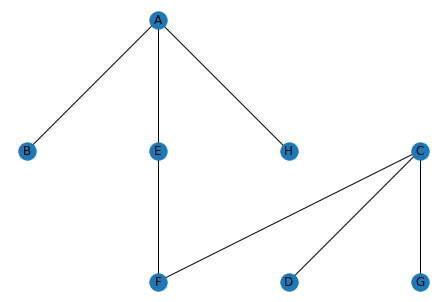

In [19]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# Plot trees
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False)
plt.show()


### Conclusion
A weighted graph is a graph that each branch of it is given a numerical weight. Dijkstra’s algorithm is a shortest path algorithm to traverse weighted edges. In this question, we discussed about how to implement Dijkstra’s algorithm to find the shortest path between vertices step by step, and also the time complexity of implementing it.

## Question3
### Introduction
A minimum spanning tree is a tree that spanning a connected, undirected graph. It connects all the vertices together with the minimal total weighting for its edges. In this question, we will first apply Prime’s algorithm to find which bridges to build so that the total construction cost for connecting the given islands is minimized, and then verify the finding using netwrokx Python package.

### 3a
The table below shows the distances with neighbour nodes of each node, this will not be all shown in the graph below plots below(i.e. only shown for step 1 and 9, and the distance of minimum-weighted edge found when applying the prim's algorithm will also be presented) since there are too many of them

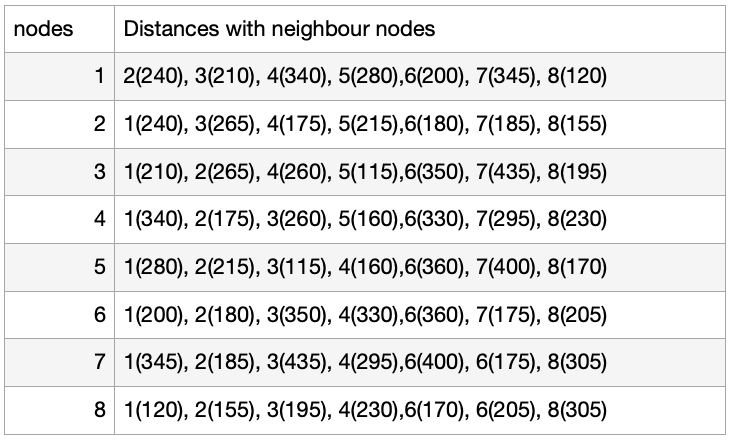

The Prim’s algorithm will now be applied to the given weighted graph and below is the changes of the graph after each step

   
Note that nodes have been visited are in **pink** colour, minimum-weighted edge currently known for each node are in **red**, unvisited neighbours for the current vertex are in **yellow**, number beside each graph in **dark blue** show the order of these graphs(steps), and the best path known so far to each node are put in the array named visited. Also, the distances with neighbour nodes of each islands are marked in step 1 and 9 as references, these distance values are same for all steps and details of them are provided in the above table

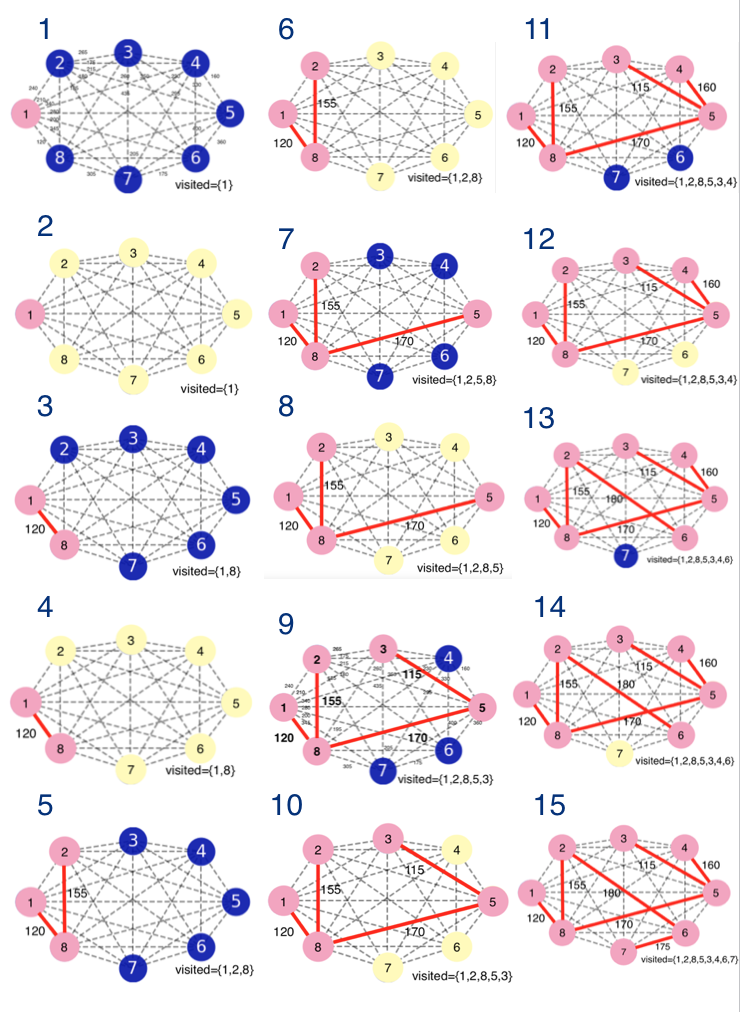

In the above graph, we first pick a random vertice as the tree root node(1 is picked here),
then connected to to its neighbours from the edges(excluding ones already in the tree), find the minimum-weighted edge, and add it into the tree. After that we move the edge to the vertex and mark it as visited, and finally we repeat from step 2 until all vertices are represented in the tree
    

We can see that after applying prim’s algorithm, the spanning tree created have the following edges: 

[('6', '7'),
 ('6', '2'),
 ('2', '8'),
 ('8', '1'),
 ('8', '5'),
 ('5', '3'),
 ('5', '4')]
 
 This shows us which 7 bridges we need to build for linking the eight small islands in a lake in order to minimize the total construction cost.

### 3b i,ii
We will use the `networkx` package (https://networkx.github.io/documentation/) to create a graph, $G$, and add vertices (nodes) $A$ through $G$ with edges.

In [70]:
import math
import networkx as nx
import matplotlib.pyplot as plt
import sys
#create an empty weighted graph, G
G = nx.Graph()

#add vertices (nodes) with their weights given in table 2
G.add_node('1')
G.add_node('2')
G.add_node('3')
G.add_node('4')
G.add_node('5')
G.add_node('6')
G.add_node('7')
G.add_node('8')

G.add_edge('1', '2', weight=240)
G.add_edge('1', '3', weight=210)
G.add_edge('1', '4', weight=340)
G.add_edge('1', '5', weight=280)
G.add_edge('1', '6', weight=200)
G.add_edge('1', '7', weight=345)
G.add_edge('1', '8', weight=120)

G.add_edge('2', '3', weight=265)
G.add_edge('2', '4', weight=175)
G.add_edge('2', '5', weight=215)
G.add_edge('2', '6', weight=180)
G.add_edge('2', '7', weight=185)
G.add_edge('2', '8', weight=155)

G.add_edge('3', '4', weight=260)
G.add_edge('3', '5', weight=115)
G.add_edge('3', '6', weight=350)
G.add_edge('3', '7', weight=435)
G.add_edge('3', '8', weight=195)

G.add_edge('4', '5', weight=160)
G.add_edge('4', '6', weight=330)
G.add_edge('4', '7', weight=295)
G.add_edge('4', '8', weight=230)

G.add_edge('5', '6', weight=360)
G.add_edge('5', '7', weight=400)
G.add_edge('5', '8', weight=170)

G.add_edge('6', '7', weight=175)
G.add_edge('6', '8', weight=205)

G.add_edge('7', '8', weight=305)

print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 8
Number of edges: 28
Average degree:   7.0000


### 3biii
Again, we will use the networkx plotting functionality (that uses `matplotlib` under the covers) to plot the graph. The layout could be visualised in any way as the origin and the lengths of the edges are arbitrary.

The x and y co-ordinates in a dictionary is specified so that the layout is close to that in the question.

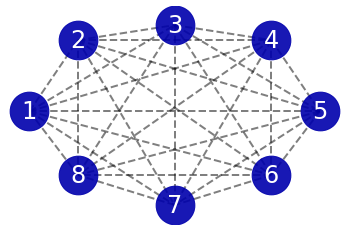

In [71]:
pos= {'1': [-1.2, -1.5], '2': [-.8,  .4],
      '3': [0,.8], '4': [.8, .4], '5': [1.2, -1.5], 
      '6': [.8,-3.2],'7': [.0, -4],  '8': [ -.8, -3.2]}
nx.draw_networkx_nodes(G, pos, node_size=1500, alpha=.9, node_color='#0000ac')
nx.draw_networkx_edges(G, pos,
                           width=2, alpha=0.5, edge_color='k', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=24, font_family='sans-serif', font_color='white')
plt.ylim([-4.5,1.3])
limits=plt.axis('off') # turn of axis

### 3b iv
Compute the MST using Prim’s algorithm

In [72]:
from networkx.algorithms import tree
mst = tree.minimum_spanning_edges(G, algorithm='prim',data=False)

In [73]:
edgelist = list(mst)

A list that contains the minimum spanning tree

In [79]:
edgelist

[('6', '7'),
 ('6', '2'),
 ('2', '8'),
 ('8', '1'),
 ('8', '5'),
 ('5', '3'),
 ('5', '4')]

### 3b v
We use node positioning algorithms provided by Graphviz for drawing the shortest path tree http://sparkandshine.net/en/networkx-application-notes-draw-trees-with-pygraphviz/

First we remove all unwanted edges

In [26]:
G.remove_edge('1', '2')
G.remove_edge('1', '3')
G.remove_edge('1', '4')
G.remove_edge('1', '5')
G.remove_edge('1', '6')
G.remove_edge('1', '7')

G.remove_edge('2', '3')
G.remove_edge('2', '4')
G.remove_edge('2', '5')
G.remove_edge('2', '7')

G.remove_edge('3', '4')
G.remove_edge('3', '6')
G.remove_edge('3', '7')
G.remove_edge('3', '8')

G.remove_edge('4', '6')
G.remove_edge('4', '7')
G.remove_edge('4', '8')

G.remove_edge('5', '6')
G.remove_edge('5', '7')

G.remove_edge('6', '8')

G.remove_edge('7', '8')

Draw the MST graph that all unwanted edges are removed

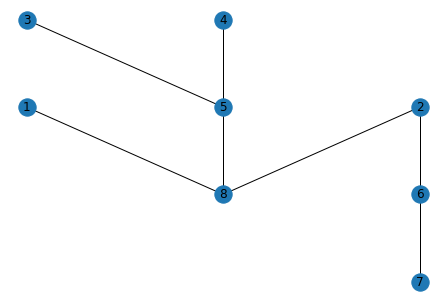

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

# Plot trees
pos=graphviz_layout(G, prog='dot')
nx.draw(G, pos, with_labels=True, arrows=False)
plt.show()

### Conclusion
A weighted graph is a graph that each branch of it is given a numerical weight. In this 
uestion, we discussed about how to implement Prim’s algorithm, a alrorithm that create a minimum spanning tree from a weighted, undirected graph, to find which bridges to build so that the total construction cost is minimized